A notebook to update the L2 throughputs, starting with the source in Docushare, Document-17872, and displaying exactly what is used and how.


- S. Ritz updated 17 July 2018
 -- modified 26 July 2018, based on discussions with Lynne Jones and Chuck Claver about directory structure and filenames
 -- LJones modified Jan 23, 2019, to use expected directory structure for components.

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# this magic command makes plots appear within the notebook
%matplotlib inline

# Import bandpassUtils, without requiring or using LSST stack -- in order to get the defaultDirectory layout.
currentdir = os.getcwd()
syseng_python = os.path.normpath(os.path.join(currentdir, '../python/lsst/syseng/throughputs'))
if syseng_python not in sys.path:
    sys.path.append(syseng_python)
from bandpassUtils import setDefaultDirs

In [2]:
# Set matplotlib parameters (or update)
# avoid an annoying warning
#plt.rcParams.update({'figure.max_open_warning': 0})

# define figure size parameters to make figures larger than default
figwidth=8
figheight=6

In [3]:
defaultDirs = setDefaultDirs(rootDir = os.path.normpath(os.path.join(currentdir, '..')))
for k, v in defaultDirs.items():
    print(k, v)

detector /Users/lynnej/lsstRepos/syseng_throughputs/components/camera/detector/joint_minimum
lens1 /Users/lynnej/lsstRepos/syseng_throughputs/components/camera/lens1
lens2 /Users/lynnej/lsstRepos/syseng_throughputs/components/camera/lens2
lens3 /Users/lynnej/lsstRepos/syseng_throughputs/components/camera/lens3
filters /Users/lynnej/lsstRepos/syseng_throughputs/components/camera/filters
mirror1 /Users/lynnej/lsstRepos/syseng_throughputs/components/telescope/mirror1
mirror2 /Users/lynnej/lsstRepos/syseng_throughputs/components/telescope/mirror2
mirror3 /Users/lynnej/lsstRepos/syseng_throughputs/components/telescope/mirror3
atmosphere /Users/lynnej/lsstRepos/syseng_throughputs/siteProperties


In [4]:
docusharefile = 'Document-17872.xlsx'
# for all sheets
#  df = pd.read_excel(docusharefile, sheet_name=None)  

# for the current performance
perfsheet = 'Performance summary as-built'
# Parse the column headers -- note this does not work for per-filter columns.
df = pd.read_excel(docusharefile, sheet_name=perfsheet)  
keep_cols = ['wavelength', 'L1 glass', 'L1 BBAR', 'L2 glass', 'L2 BBAR', 'l3 glass', 'L3 BBAR', 'CCD QE', 
            'CCD Condensible*', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 
             'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14']
new_cols = ['wavelength', 'L1 glass', 'L1 BBAR', 'L2 glass', 'L2 BBAR', 'L3 glass', 'L3 BBAR', 'CCD QE', 
           'CCD Condensible', 'filter_u', 'filter_g', 'filter_r', 'filter_i', 'filter_z', 'filter_y']
# I'm not entirely sure if this "filter_*" column represents the entire filter curve or not?
for k in keep_cols:
    if k not in df:
        print('Cannot find column %s in dataframe!')
df = df[keep_cols]
mask = np.where(np.isnan(df['wavelength']), False, True)
df = df[mask]
df.columns = new_cols
df[0:3]

,wavelength,L1 glass,L1 BBAR,L2 glass,L2 BBAR,L3 glass,L3 BBAR,CCD QE,CCD Condensible,filter_u,filter_g,filter_r,filter_i,filter_z,filter_y
5,300.0,0.988927,0.978311,0.988673,0.912337,0.991001,0.968562,0.360000,1.0,0,0,0,0,0,0
6,301.0,0.988811,0.978295,0.988554,0.910119,0.990907,0.968438,0.364699,1.0,0,0,0,0,0,0
7,302.0,0.988695,0.978279,0.988436,0.907900,0.990813,0.968007,0.369397,1.0,0,0,0,0,0,0


(0.85, 1.05)

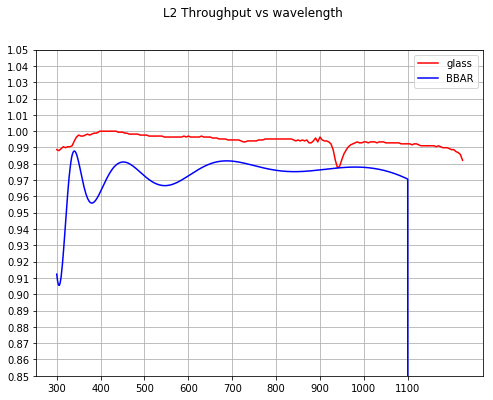

In [5]:
fig1 = plt.figure(figsize=(figwidth, figheight))
plt.plot(df['wavelength'], df['L2 glass'], 'r-', label='glass')
plt.plot(df['wavelength'], df['L2 BBAR'], 'b-', label='BBAR')
plt.suptitle('L2 Throughput vs wavelength')
ax=fig1.gca()
ax.grid(True)
ax.set_xticks(np.arange(300, 1200, 100.))
ax.set_yticks(np.arange(0., 2., 0.01))
plt.legend()
plt.ylim(0.85,1.05)

The current SE calculations want text files from 300 nm to 1200 nm .. the code will interpolate between these points, but capturing the variations has to be done by writing these into the output files. 

Save text files to disk in appropriate directories.

In [6]:
# What's in the destination directory already? 
component = 'lens2'
contents = os.listdir(defaultDirs[component])
for c in contents:
    tmp = os.path.join(defaultDirs[component], c)
    if os.path.isdir(tmp):
        print('In directory %s:\n \t %s' % (tmp, os.listdir(tmp)))
    else:
        print(tmp)

/Users/lynnej/lsstRepos/syseng_throughputs/components/camera/lens2/l2_Glass.dat
In directory /Users/lynnej/lsstRepos/syseng_throughputs/components/camera/lens2/l2_Losses:
 	 ['l2_S1_Contamination.dat', 'l2_S2_Condensation.dat', 'l2_S2_Contamination.dat', 'l2_S1_Condensation.dat']
In directory /Users/lynnej/lsstRepos/syseng_throughputs/components/camera/lens2/l2_Coatings:
 	 ['l2_BBAR.dat']


In [7]:
replacement_file = os.path.join(defaultDirs[component], 'l2_Glass.dat')
print('Writing to file %s' % replacement_file)

header = '#Wavelength(nm)   Throughput(0-1)'
with open(replacement_file, 'w') as f:
    print(header, file=f)
    for i, row in df.iterrows():
        print(round(row['wavelength'], 1), round(row['L2 glass'], 4), file=f)

Writing to file /Users/lynnej/lsstRepos/syseng_throughputs/components/camera/lens2/l2_Glass.dat


In [8]:
replacement_file = os.path.join(defaultDirs[component], 'l2_Coatings', 'l2_BBAR.dat')
print('Writing to file %s' % replacement_file)

header = '#Wavelength(nm)   Throughput(0-1)'
with open(replacement_file, 'w') as f:
    print(header, file=f)
    for i, row in df.iterrows():
        print(round(row['wavelength'], 1), round(row['L2 BBAR'], 4), file=f)

Writing to file /Users/lynnej/lsstRepos/syseng_throughputs/components/camera/lens2/l2_Coatings/l2_BBAR.dat


In [9]:
# Compare to prior curves, from github:master -- first clone new copy (default = master).
import shutil
import subprocess

masterdir = 'syseng_master'
shutil.rmtree(masterdir)
gitcommand = 'git clone https://github.com/lsst-pst/syseng_throughputs.git %s' % masterdir
subprocess.run(args=gitcommand.split(), check=True)

CompletedProcess(args=['git', 'clone', 'https://github.com/lsst-pst/syseng_throughputs.git', 'syseng_master'], returncode=0)

In [10]:
masterDirs = setDefaultDirs(rootDir=masterdir)
l2_glass = pd.read_csv(os.path.join(masterDirs[component], 'l2_Glass.dat'), delim_whitespace=True,
                      comment='#', header=None, names=['wavelength', 'sb'])
l2_bbar = pd.read_csv(os.path.join(masterDirs[component], 'l2_Coatings', 'L2_BBAR.dat'), delim_whitespace=True,
                     comment='#', header=None, names=['wavelength', 'sb'])

(0.85, 1.05)

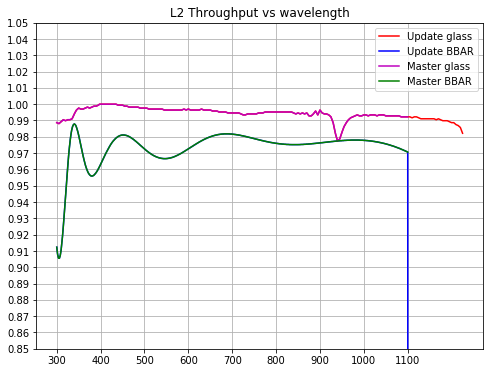

In [11]:
fig1 = plt.figure(figsize=(figwidth, figheight))
plt.plot(df['wavelength'], df['L2 glass'], 'r-', label='Update glass')
plt.plot(df['wavelength'], df['L2 BBAR'], 'b-', label='Update BBAR')
plt.plot(l2_glass['wavelength'], l2_glass['sb'], 'm-', label='Master glass')
plt.plot(l2_bbar['wavelength'], l2_bbar['sb'], 'g-', label='Master BBAR')
plt.title('L2 Throughput vs wavelength')
ax=fig1.gca()
ax.grid(True)
ax.set_xticks(np.arange(300, 1200, 100.))
ax.set_yticks(np.arange(0., 2., 0.01))
plt.legend()
plt.ylim(0.85,1.05)

In [12]:
# When all done - remove the git clone.
shutil.rmtree(masterdir)